# <font color='pink'> Unsupervised Learning Exercise: K-Means & GMM </font>

### 1. Load digits dataset

In [3]:
from sklearn.datasets import load_digits # load the digits dataset which represents images
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
digits = load_digits()
X = digits.data
Y = digits.target

### 2. Choose only three classes

In [4]:
selected_classes = [0,2,4] # we selected the classes 0,2, and 4 and filtered the X and Y np arrays
mask = np.isin(Y, selected_classes)
X_filtered = X[mask]
Y_filtered = Y[mask]

### 3.	Perform PCA to reduce the data to 2 dimensions.

In [5]:
pca = PCA(n_components=2) # reduce the data (64 features) dimensionality to 2 features
pca.fit(X_filtered)
reduced_data= pca.transform(X_filtered)

### 4.	Run the built-in KMeans algorithm on the PCA-transformed data.

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)
kmeans_labels

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2,
       0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0,
       1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2,

The output array did not come out 100% accurate even though the number of clusters is equal to the number of classes because, the dimensionality reduction done with PCA might have distorted some of the data

### 5.	Plot the KMeans clusters in the 2D space and compare them to the original digit labels.

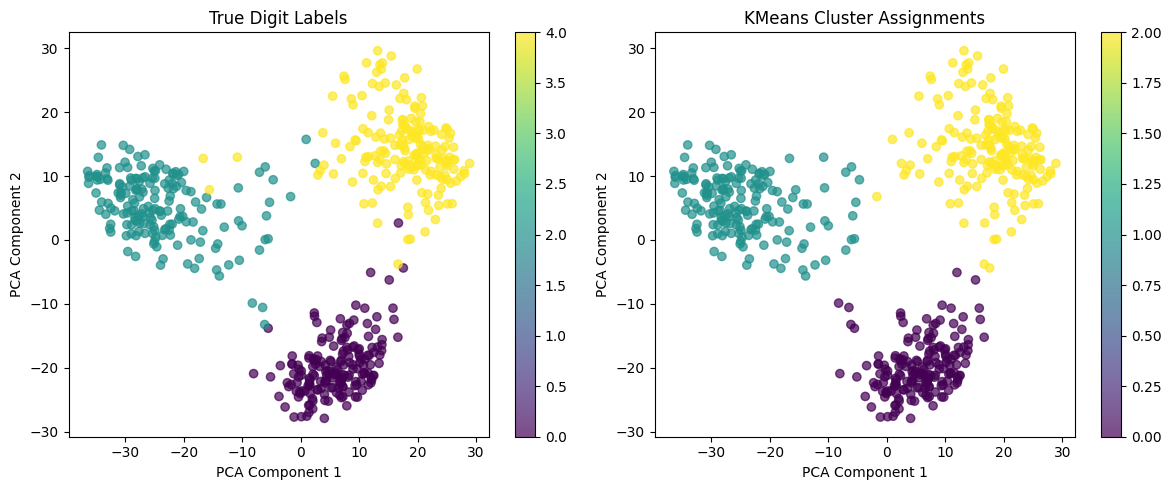

In [7]:
# Now plotting:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

scatter1 = axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_filtered, cmap='viridis', alpha=0.7)
axes[0].set_title('True Digit Labels')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
fig.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[1].set_title('KMeans Cluster Assignments')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
fig.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


### 6.	Use the "elbow" method to find the best value of k: plot inertia vs. k for k in a range.

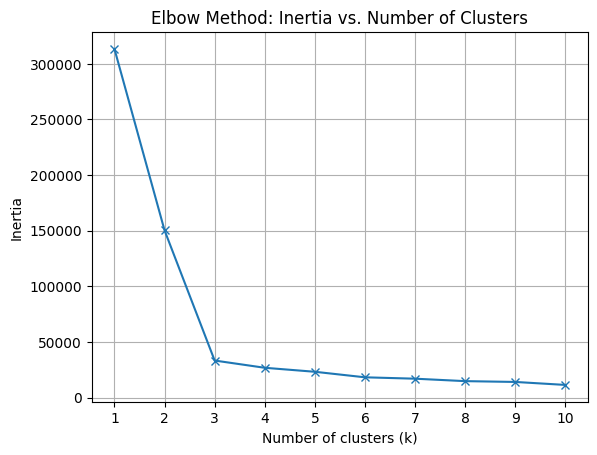

In [8]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='x')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

we can clearly see from the graph that the elbow point is at k=3!

### 7.	Run GaussianMixture (GMM) with two covariance types: 'full' and 'diag'.

In [9]:
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, n_components=3, max_iter=100, alpha=1e-4, covariance_type='full', random_state=42):
        self.log_likelihoods = None
        self.resp = None
        self.k = n_components
        self.max_iter = max_iter
        self.alpha = alpha
        self.covariance_type = covariance_type
        self.random_state = np.random.RandomState(random_state)
        
    def _initialize_params(self, X):
        n_samples, n_features = X.shape
        self.weights = np.ones(self.k) / self.k # give equal weights for each gaussian component
        self.means = X[self.random_state.choice(n_samples, self.k, replace=False)] # choose k random means
        if self.covariance_type == 'full':
            self.covariances = np.array([np.cov(X.T) for _ in range(self.k)])
        elif self.covariance_type == 'diag':
            variances = np.var(X, axis=0)
            self.covariances = np.array([np.diag(variances) for _ in range(self.k)])
        
    # Estimation step: for each data point, compute the probability it belongs to each cluster
    def _e_step(self, X):
        n_samples = X.shape[0]
        self.resp = np.zeros((n_samples, self.k))
        for i in range(self.k):
            rv = multivariate_normal(mean=self.means[i], cov=self.covariances[i])
            self.resp[:, i] = self.weights[i] * rv.pdf(X)
            
        total_resp = self.resp.sum(axis=1)[:, np.newaxis]
        self.resp /= total_resp
        
        # calculate likelihood for convergence (used in the stopping rule)
        log_likelihood = np.sum(np.log(total_resp))
        return log_likelihood
    
    # Maximization step for updating the means, weights, and covariances using the computed responsibilities.
    def _m_step(self, X):
        n_samples = X.shape[0]
        
        effective_n = self.resp.sum(axis=0)
        self.weights = effective_n / n_samples
        self.means = (self.resp.T @ X) / effective_n[:, np.newaxis]
        for i in range(self.k):
            diff = X - self.means[i]
            if self.covariance_type == 'full':
                self.covariances[i] = (self.resp[:, i][:, np.newaxis] * diff).T @ diff / effective_n[i]
            elif self.covariance_type == 'diag':
                var = np.sum(self.resp[:, i][:, np.newaxis] * (diff ** 2), axis=0) / effective_n[i]
                self.covariances[i] = np.diag(var)

    # Main flow of the algorithm.
    def fit(self, X):
        self._initialize_params(X)
        self.log_likelihoods = []
        for iteration in range(self.max_iter):
            log_likelihood = self._e_step(X)
            self._m_step(X)
            self.log_likelihoods.append(log_likelihood)
            if iteration > 0 and abs(log_likelihood - self.log_likelihoods[-2]) < self.alpha:
                break
    
    # Function to Assign the most likely cluster to each point based on max responsibility.
    def predict(self, X):
        n_samples = X.shape[0]
        resp = np.zeros((n_samples, self.k))
    
        for i in range(self.k):
            rv = multivariate_normal(mean=self.means[i], cov=self.covariances[i])
            resp[:, i] = self.weights[i] * rv.pdf(X)
    
        resp /= resp.sum(axis=1)[:, np.newaxis]
        return np.argmax(resp, axis=1)

In [10]:
# Create instance of gmm to run the algorithm on our dimensionally reduced data
gmm = GMM(n_components=3, max_iter=100, alpha=1e-4)
gmm.fit(reduced_data)
labels = gmm.predict(reduced_data)

### 8.	Plot the log-likelihood over EM iterations for each covariance type to verify it increases.

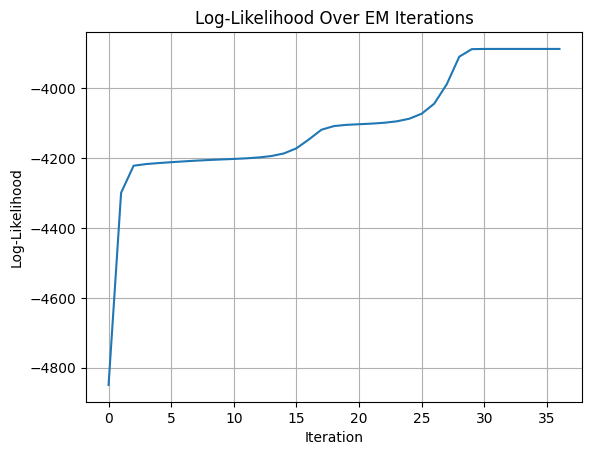

In [11]:
plt.plot(gmm.log_likelihoods)
plt.title("Log-Likelihood Over EM Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()